<a href="https://colab.research.google.com/github/cmelende/CS5262-50_Project/blob/main/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1**

Cory Melendez

### Background:
One of the most coveted types of prediction, maybe only second to knowing the lottery numbers, is that of the stock market. Stock traders, that is Non HFT/algo traders, will typically look to tools such as quantitative analysis (QA). They attempt to detect patterns that arise from human behavior, believed to be unchanging. This project instead attempts to use ML models in order to build up a scientifically more sound method than methods such as QA that can predict how the market will move in the very short term.

One of the challenges to this project, and will require further research, is to identity not only if our model will have an acceptable accuracy using the data below, but why. Markets are ever-changing, and are constantly affected not only by geoeconomic events, but geopolitical events as well. Identifying the circumstances where it *could* work and *when* it could work is just as important as building the model itself. We found paper 1, which goes over how researchers used this dataset, and paper 2, a summary of 100 published articles, to be a good starting point in understanding what we will call the 'reproducability' problem as well as understanding how to build our models better.

The last challenge is the size of the data, I'll be trimming the number of columns not only to stay under the column limit, but to better narrow down and understand the factors that contribute to the output.



### Project Description: 
This project's main aim is to output a binary classificiation that will be able to tell a theoritical day trader whether or not they should buy and sell a stock on a certain day.This project will use data from link below in order to build our ML models. We will also refer to the paper below in order for not only reference on how a model can be built, but to also refer to it for understanding the domain.

Our main methodology will be to groom the data into something that is digestible by the model. Since our aim is to only output a binary classification (yes/no), the question we will be asking our model is 'should i buy the stock at close today and sell at close of tomorrow'. This simple strategy will simplify the model greatly, but will require restructuring the data and creating a target column that our model predicts.

Our simple goals that define success is as follows: Can we beat not entering the market at all (not investing)? Can our model beat a trading algorithm that simply randomly outputs yes/no? A goal beyond that would be to answer: What other non-ML algorithms, in the same time and circumstances, can our model beat?


Data: https://archive.ics.uci.edu/ml/datasets/CNNpred%3A+CNN-based+stock+market+prediction+using+a+diverse+set+of+variables

Paper: https://reader.elsevier.com/reader/sd/pii/S0957417419301915?token=746C33D1046F2DDA4EE614C2A4606AF2260493F0DC652081FF1F03968E01DC023369A293A638CEE35E24DB8BB7EE1259&originRegion=us-east-1&originCreation=20230119051158

Paper 2: https://reader.elsevier.com/reader/sd/pii/S0957417421009441?token=EEE8A8BF467B1370F99F73C46DC7AD74D88F0AB17AC08F5137A3B16E14E69D382DE8A689EF492C09E0CF67690D289807&originRegion=us-east-1&originCreation=20230119052216

### Performance Metric: 

Our metric will be pretty simple, given any trade, or a group of trades, advised by the model, is: 

(current price - bought price ) * X > X * epsilon, where X is the amount of money that was invested and epsilon is any arbitrary small positive number

 
If this statement is true, then our model has outperformed our money not entering the market at all by an arbitrary small number.

Furthermore, 

does:

Sum(MLProfit) > Sum(RandomProfit) * epsilon

Where Sum(MLProfit) is the profit made from a arbitrary number of trades using our ML model greater, and Sum(RandomProfit) is the profit madae from an arbitrary number of trades using a random output algorithm, and epsilon is an arbitrary small number

If so, then we have beaten randomness by a factor of epsilon and have met our main objective.





### Description 

Questions to be answered
1. Is there a correlation between oil and stock prices and gold?
2. Is there any difference between any (example we'll use) stock b/tw different exchanges?
3. Whats the average % difference between NYSE and NASDAQ? 




In [ ]:
#imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#import NYSE data
nyse_file = 'Processed_NYSE.csv'
nyse = pd.read_csv(nyse_file)

display(nyse.sample(5))

,Date,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,...,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
1619,2016-06-08,10638.360352,0.007732,0.003693,0.004207,0.006377,0.000034,1.754490,2.750752,3.711878,...,0.39,1.84,0.79,0.37,-0.62,-0.27,-0.26,2.06,3.97,1.47
792,2013-02-26,8766.169922,-0.008918,0.005364,-0.019701,0.009573,-0.008256,-2.645595,-1.713749,-0.978450,...,-0.92,1.37,0.08,0.35,-0.05,0.20,0.24,0.85,1.24,1.21
21,2010-02-02,7101.439941,0.164785,0.013300,0.018079,-0.010523,-0.011175,1.040364,-4.597729,-4.666499,...,0.62,0.50,0.92,1.01,-0.18,-0.30,-0.29,2.66,0.00,0.71
1836,2017-04-19,11342.419922,0.076475,-0.003178,-0.004244,0.009056,-0.008635,-1.143494,-1.116949,-1.317401,...,-0.55,-0.60,0.51,-0.15,0.22,0.24,0.24,-0.89,-0.55,-0.77
1144,2014-07-21,10957.669922,-0.159334,-0.002571,0.008767,-0.011566,0.004764,-0.307509,-0.708055,-0.152717,...,-0.13,0.18,-0.31,-0.27,-0.09,0.05,0.05,-0.28,0.43,0.08


In [ ]:
#import NASDAQ data
nasdaq_file = 'Processed_NASDAQ.csv'
nasdaq = pd.read_csv(nasdaq_file)

display(nasdaq.sample(5))

,Date,Close,Volume,mom,mom1,mom2,mom3,ROC_5,ROC_10,ROC_15,...,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,wheat-F,XAG,XAU
1169,2014-08-25,4557.350098,0.055503,0.004142,0.001423,0.001242,-0.000227,1.087770,3.544838,3.956759,...,-0.86,-0.62,0.16,0.36,0.15,0.25,0.26,1.16,-0.31,-0.36
1359,2015-05-28,5097.979980,-0.037650,-0.001686,0.014672,-0.011123,-0.000281,0.517372,2.334349,3.625059,...,-1.22,0.09,0.00,0.04,-0.61,-0.42,-0.41,-0.18,0.00,0.03
1447,2015-10-01,4627.080078,-0.110226,0.001498,0.022766,-0.005865,-0.030413,-2.268462,-5.453062,-3.527129,...,0.06,-0.05,-0.07,0.42,0.40,-0.16,-0.17,1.12,-0.34,-0.13
1363,2015-06-03,5099.229980,0.071068,0.004474,-0.001261,0.002544,-0.005483,-0.144125,0.575937,2.472575,...,-0.42,-1.99,1.11,0.44,0.08,-0.39,-0.38,-0.68,-1.37,-0.66
1436,2015-09-16,4889.240234,0.049715,0.005909,0.011395,-0.003438,0.005440,2.790069,5.460196,8.493306,...,0.24,3.90,0.83,0.93,-0.24,-0.24,-0.20,-1.21,3.40,1.28


<class 'str'>


### Charts

In [ ]:
correlation_cols = ['Oil', 'Gold', 'AAPL', 'AMZN', 'GE', 'JPM', 'JNJ', ]
correlation = nasdaq[correlation_cols].corr()
round(correlation, 2)

,Oil,Gold,AAPL,AMZN,GE,JPM,JNJ
Oil,1.00,-0.01,0.12,0.12,0.18,0.18,0.10
Gold,-0.01,1.00,-0.03,-0.00,-0.01,-0.02,-0.00
AAPL,0.12,-0.03,1.00,0.34,0.35,0.35,0.29
AMZN,0.12,-0.00,0.34,1.00,0.33,0.33,0.32
GE,0.18,-0.01,0.35,0.33,1.00,0.62,0.48
JPM,0.18,-0.02,0.35,0.33,0.62,1.00,0.47
JNJ,0.10,-0.00,0.29,0.32,0.48,0.47,1.00


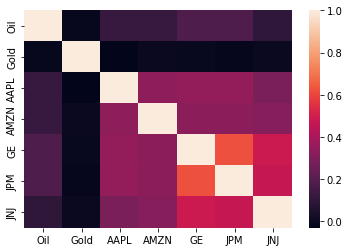

In [ ]:
sns.heatmap(correlation)

In [ ]:
stock_cols = ['Oil', 'Gold', 'AAPL', 'AMZN', 'GE', 'JPM', 'JNJ']
diff_df = pd.DataFrame()
for stock in stock_cols: 
  diff_df[f'Difference_{stock}'] = nasdaq[stock] - nyse[stock]

display(diff_df)

,Difference_Oil,Difference_Gold,Difference_AAPL,Difference_AMZN,Difference_GE,Difference_JPM,Difference_JNJ
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1979,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1980,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1981,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1982,0.0,0.0,0.0,0.0,0.0,0.0,0.0
